In [0]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob 
import scipy as sp

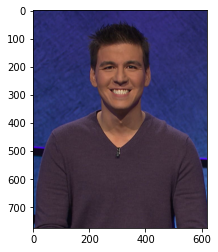

In [10]:
# showing image for fun
plt.imshow(image.load_img('test.jpg'))
plt.show()

In [11]:
# downloading and initializing Resnet50 Model
resnet = ResNet50(input_shape=(224,224,3),weights = 'imagenet',include_top = True)

102858752/102853048 [==============================] - 3s 0us/step


In [12]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
# we need the activation layer before prediction and Global Pooling which is activation_49
activation_layer = resnet.get_layer('activation_49')

In [0]:
# create a model object
model = Model(inputs=resnet.input,outputs= activation_layer.output)

In [0]:
# Now we need to get the weights of the last fully connected Layer which is fc1000
last_dense_layer = resnet.get_layer('fc1000')
weights = last_dense_layer.get_weights()[0]

In [0]:
# Reading and preprocessing the image for Resnet

img = image.load_img('football.jpg',target_size=(224,224))
x = preprocess_input(np.expand_dims(img,0))
# get the featuremaps frorm the model we created above 
featuremaps = model.predict(x)[0] #7x7x2048 feature map

In [27]:
# predict the category of input image from 1000 classes of resnet50
probs = resnet.predict(x)
classnames = decode_predictions(probs)[0]
print(classnames)

[('n04254680', 'soccer_ball', 0.9953713), ('n03445777', 'golf_ball', 0.0006301092), ('n04118538', 'rugby_ball', 0.0004357866), ('n03134739', 'croquet_ball', 0.00024791888), ('n04409515', 'tennis_ball', 0.00021520552)]


In [28]:
classname = classnames[0][1] #get highest probabilty score for the image
preds = np.argmax(probs[0]) # get maximum probability value along an axis
print(classname)
print(preds)

soccer_ball
805


In [0]:
# get the 2048 weights from the resnet for the target class
w= weights[:,preds]

In [0]:
# perform a dot product of feature maps and weights
product = featuremaps.dot(w)

# Now upsample the image to 224,224
# 7x32= 224
product = sp.ndimage.zoom(product,(32,32),order=1)

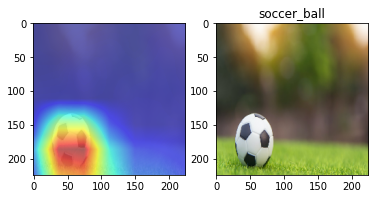

In [39]:
#plotting the results
plt.subplot(1,2,1)
plt.imshow(img,alpha=0.4)
plt.imshow(product,cmap='jet',alpha=0.6)
plt.subplot(1,2,2)
plt.imshow(img)
plt.title(classname)
plt.show()